# 样题2

### 模块A 大数据

##### 任务1.1 配置hosts文件
```shell
vim /etc/hosts
192.168.85.11 master
192.168.85.12 node1
192.168.85.13 node2
```

##### 任务1.2 修改 Hadoop 配置文件
```shell
vim ~/hadoop/etc/hadoop/hdfs-site.xml
```
```xml
<property>
  <name>dfs.blocksize</name>
  <value>33554432</value>
</property>

```

##### 任务1.3 启动Hadoop集群
```shell
start-dfs.sh
start-yarn.sh

```

##### 任务2.1 HDFS上新建目录：

```shell
hdfs dfs -mkdir /task2
```

##### 任务2.2 修改HDFS目录权限：
```shell
hdfs dfs -chmod -R 777 /task2
```

##### 任务2.3 上传本地文件到HDFS上：
```shell
hadoop fs -put ~/data/task2_3.csv /task2/
```

##### 任务3.1 Sqoop连接Mysql并查询：
```shell
sqoop-eval \
  --connect jdbc:mysql://node1/bric_competition \
  --username root \
  --password 123456 \
  --query "SELECT COUNT(*) FROM task3_1" \
  > ~/results/task3-1.txt
```

##### 任务3.2 Sqoop导入：
```shell
sqoop-import \
  --connect jdbc:mysql://node1/bric_competition \
  --username root \
  --password 123456 \
  --table task3_2 \
  --hive-import \
  --hive-database default \
  --hive-table task3_2

```

##### 任务3.3 Sqoop导出
```shell
sqoop export \
  --connect jdbc:mysql://node1/bric_competition \
  --username root \
  --password 123456 \
  --table task3_3 \
  --export-dir /sqoop/task3_3 \
  --input-fields-terminated-by '\t'

```

##### 任务4.1计算用户注册数量
```shell
hive -e "
SELECT register_time, COUNT(*) as register_count
FROM game_data
GROUP BY register_time
ORDER BY register_count DESC
LIMIT 1;
" > ~/results/task4-1.txt
```

##### 任务4.2计算ARPU：
```shell
hive -e "
SELECT ROUND(SUM(pay_price) / COUNT(DISTINCT user_id), 2) as ARPU
FROM game_data
WHERE avg_online_minutes >= 30
" > ~/results/task4-2.txt
```

##### 任务4.3 计算用户付费转化率：
```shell
hive -e "
SELECT bd_stronghold_level
FROM game_data
GROUP BY bd_stronghold_level
HAVING COUNT(DISTINCT user_id) = COUNT(DISTINCT CASE WHEN pay_price > 0 THEN user_id END)
" > ~/results/task4-3.txt
```

##### 任务5.1 Spark 组件安装
```shell
tar -zxvf ~/hadoop搭建相关安装包/spark-2.4.6-bin-hadoop2.7.tgz -C ~
vim /etc/profile
export SPARK_HOME=~/spark-2.4.6-bin-hadoop2.7
export PATH=$PATH:$SPARK_HOME/bin
scp /etc/profile node1:$PWD
scp /etc/profile node3:$PWD
source /etc/profile#三台机器都需执行

vim ~/spark-2.4.6-bin-hadoop2.7/conf/spark-env.sh
export HADOOP_CONF_DIR=~/hadoop/etc/hadoop
export JAVA_HOME=/opt/module/jdk
export SPARK_MASTER_HOST=master
export SPARK_MASTER_PORT=7077

vim ~/spark-2.4.6-bin-hadoop2.7/conf/workers
node1
node2

scp -r ~/spark-2.4.6-bin-hadoop2.7 node1:$PWD
scp -r ~/spark-2.4.6-bin-hadoop2.7 node2:$PWD

cd ~/spark-2.4.6-bin-hadoop2.7
./sbin/start-all.sh
```

##### 任务5.2  Spark 连接 Hive
```shell
cp ~/spark-2.4.6-bin-hadoop2.7/conf/spark-defaults.conf.template ~/spark-2.4.6-bin-hadoop2.7/conf/spark-defaults.conf
echo "spark.sql.catalogImplementation=hive" >> ~/spark-2.4.6-bin-hadoop2.7/conf/spark-defaults.conf
spark-sql -e "select * from default.game_data limit 1"
```

### 模块B 数据可视化

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Bar, Line, Pie
from imageio.v2 import imread
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['miSans']

'Ok'


'Ok'

In [2]:

# 任务1：数据整合
data1 = pd.read_csv('data/athlete_events.csv')
data2 = pd.read_csv('data/noc_regions.csv')
# 连接
data_merge = pd.merge(data1, data2, on='NOC', how='left')
# 输出为表,无需反复执行
data_merge.to_csv("data/data_out2.csv")
data_merge.head(1)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [3]:
# 任务2 数据处理
data_merge.drop(['notes'], axis=1, inplace=True)
data_merge = data_merge.query("Season == 'Summer'").drop('Season', axis=1)
data_merge.drop_duplicates(inplace=True)
data_merge.head(3)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark


In [4]:
# 任务3：数据分析
# 任务3.1 哪些国家每届奥运会都参加了？
countryCount = data_merge.groupby('region')['Year'].nunique()
country = countryCount[countryCount == 29].index.tolist()
print(country)


['Australia', 'France', 'Greece', 'Italy', 'Switzerland', 'UK']


In [5]:
# 任务3.2 中国参加了多少次奥运会
countryCountDict = countryCount.to_dict()
china_num = countryCountDict.get('China')
print(china_num)


19


In [6]:
# 任务3.3 2008年奥运会中国获奖人数
china_medal_num_2008:int = len(data_merge.query(
    "region == 'China' and Year == 2008 and Medal.notnull()"))
print(china_medal_num_2008)


184


In [7]:
# 任务3.4 奥运会参与次数最多的选手
num_max_name:str=data_merge[['ID','Name']].value_counts().idxmax()[1]
print(num_max_name)


Heikki Ilmari Savolainen


In [8]:
# 任务3.5 奥运会年龄最大的运动员
age_max_name=data_merge.query("Event!='Art Competitions'").sort_values('Age', ascending=False).head(1)['Name'].to_list()
print(age_max_name)


['John Quincy Adams Ward']


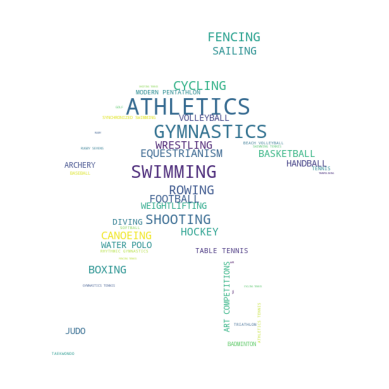

In [9]:
# 任务4.1 奥运项目词云图
sportList = data_merge['Sport'].to_list()
random.shuffle(sportList)
sportStr = " ".join(sportList).upper()
#绘制词云图
mskImg = imread("img/running.png")
WordCloudImg = WordCloud(background_color="white",mask=mskImg).generate(sportStr)
plt.imshow(WordCloudImg)  # 用plt显示图片
plt.axis("off")  # 不显示坐标轴
plt.show()  # 显示图片


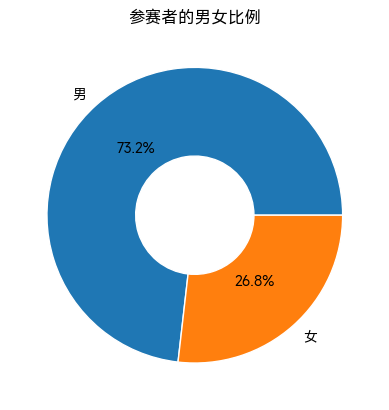

In [10]:
# 任务4.2 任务4.2 奥运会参赛选手男女比例 - 环形图（2分）
sexDict = data_merge['Sex'].value_counts().to_dict()
sexDict
labelData = ['男' if gender == 'M' else '女' for gender in list(sexDict.keys())]
valueData = list(sexDict.values())
# 使用plt绘制饼形图
# wedgeprops：设置饼图的属性，这里通过设置width来控制环形图的厚度，width为0到1之间的值，1表示饼图，0表示环形图
#            同时设置edgecolor为白色，即每个块的边框颜色为白色
plt.pie(valueData, labels=labelData, autopct='%1.1f%%',wedgeprops={'width': 0.6,'edgecolor':'white'})
plt.title("参赛者的男女比例")
plt.show()

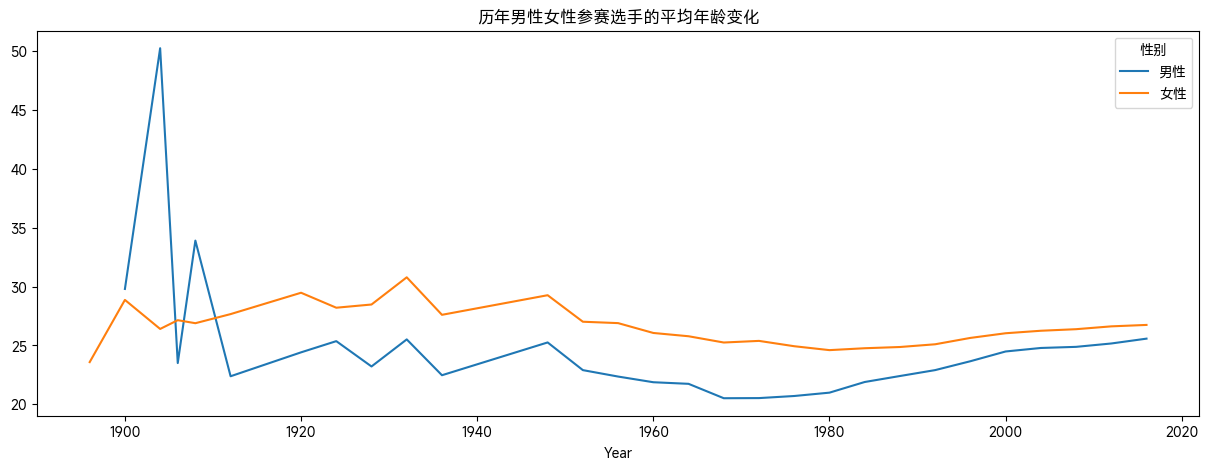

In [11]:
# 任务4.3 奥运会历年男女参赛者的平均年龄变化 - 折线图（2分）
ageMean=data_merge.groupby(['Year','Sex'])['Age'].mean()

# plt绘制折线图
plt.figure(figsize=(15, 5))
ageMean.unstack().plot(marker=None, ax=plt.gca())
plt.legend(title='性别',labels=['男性','女性'])  # 添加图例，显示性别标签
plt.title('历年男性女性参赛选手的平均年龄变化')  # 设置图形标题
plt.show()

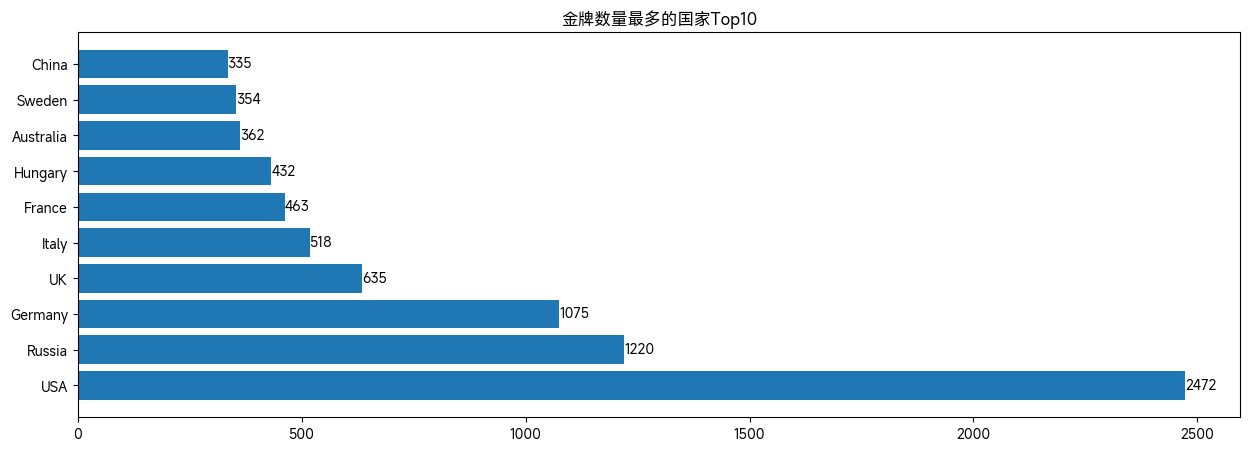

In [12]:
# 任务4.4奥运会获得金牌最多的国家 - 条形图（2分）
medalTop10=data_merge[data_merge['Medal'] == 'Gold']['region'].value_counts()[:10]
#plt绘制条形图
plt.figure(figsize=(15,5))
barhData=plt.barh(medalTop10.index,medalTop10.values)
plt.bar_label(barhData)
plt.title("金牌数量最多的国家Top10")
plt.show()


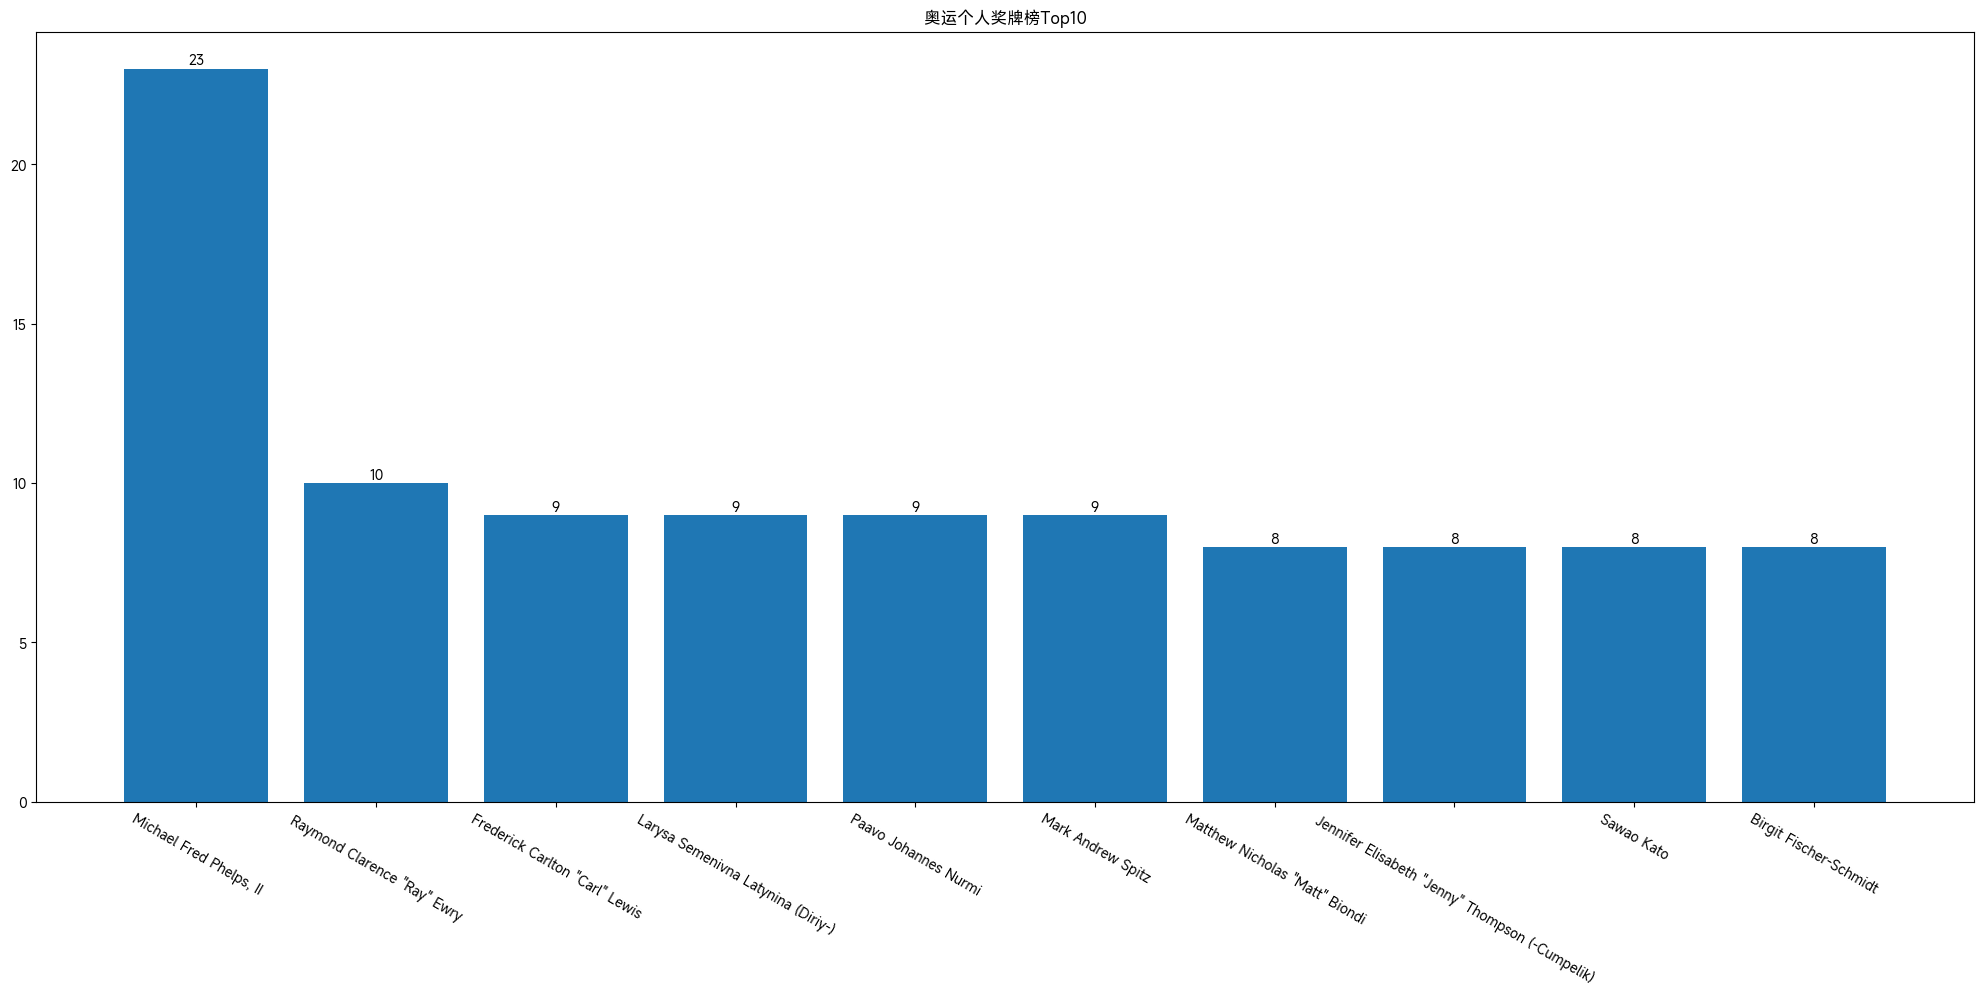

In [13]:
# 4.5奥运会获得金牌最多的选手 - 柱状图（2分）
medalTop10=data_merge[data_merge['Medal'] == 'Gold']['Name'].value_counts()[:10]
#plt绘制条形图
plt.figure(figsize=(25,10))
barData=plt.bar(medalTop10.index,medalTop10.values)
plt.bar_label(barData)
plt.title("奥运个人奖牌榜Top10")
plt.xticks(rotation=-30)
plt.show()

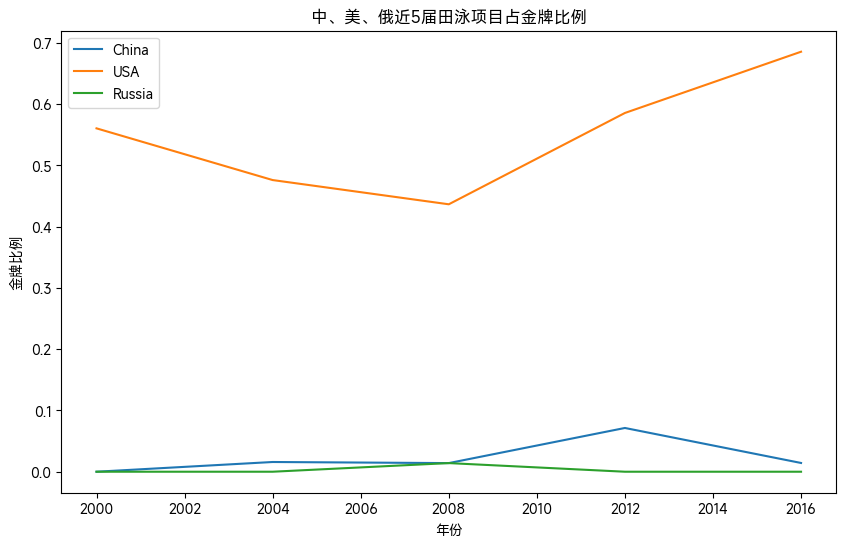

In [14]:
# 任务4.6  中、美、俄近5届田泳项目占金牌比例 - 折线图（2分）
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据存储在一个名为data_merge的DataFrame中，包含'Medal'列和'region'列

countryList = ['China', 'USA', 'Russia']
yearList = [2000, 2004, 2008, 2012, 2016]
# 筛选出中、美、俄近5届田泳项目的数据
selectData = data_merge[(data_merge['Sport'] == 'Swimming') & (data_merge['Medal'] == 'Gold')&(data_merge['Year'].isin(yearList))]
# 筛选中、美、俄近5届奥运会的数据
# 统计每年中、美、俄的金牌数量
gold_medals_by_year_country = selectData.groupby(['Year', 'region'])['Medal'].count().unstack(fill_value=0)

# 计算中、美、俄在每年田泳项目中获得的金牌比例
total_gold_medals_by_year = gold_medals_by_year_country.sum(axis=1)
proportions_by_year_country = gold_medals_by_year_country.div(total_gold_medals_by_year, axis=0)
# 绘制折线图
plt.figure(figsize=(10, 6))
for country in countryList:
    plt.plot(yearList, proportions_by_year_country[country], label=country)
plt.title('中、美、俄近5届田泳项目占金牌比例')
plt.xlabel('年份')
plt.ylabel('金牌比例')
plt.legend()
plt.show()

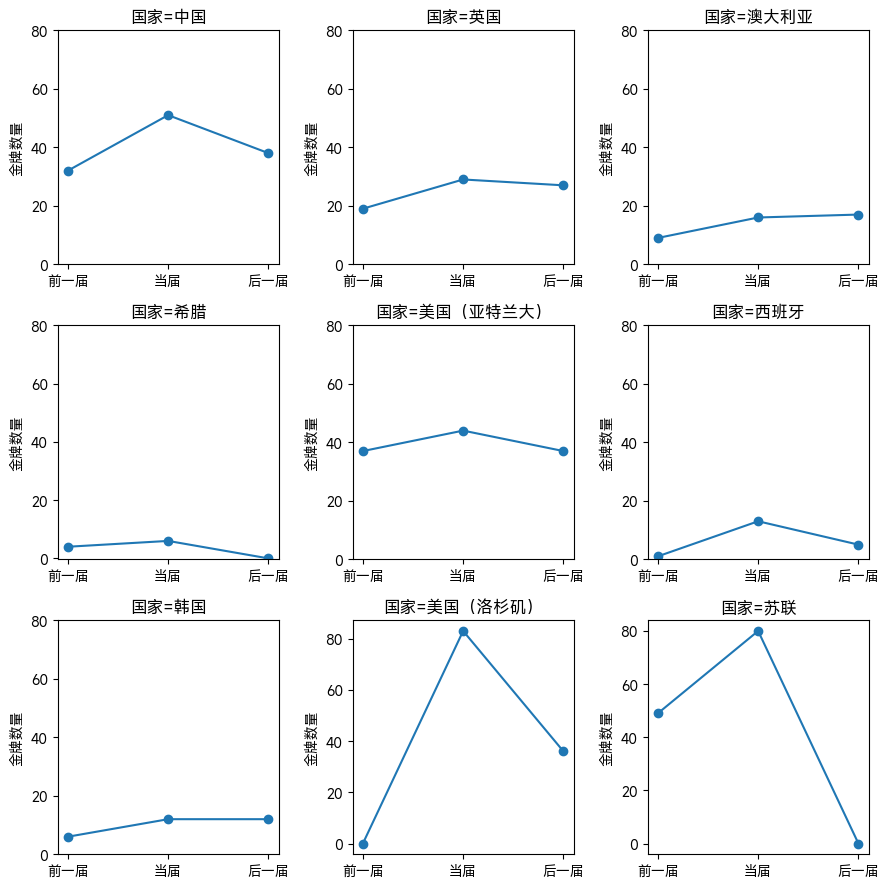

In [16]:
# 任务4.7 主场优势真的存在吗 - 折线矩阵图（2分）

df = pd.DataFrame({
    '国家': ['中国', '英国', '澳大利亚', '希腊', '美国（亚特兰大）', '西班牙', '韩国', '美国（洛杉矶）', '苏联'],
    '前一届': [32, 19, 9, 4, 37, 1, 6, 0, 49],
    '当届': [51, 29, 16, 6, 44, 13, 12, 83, 80],
    '后一届': [38, 27, 17, 0, 37, 5, 12, 36, 0]
})
df
# 绘制折线图阵列
plt.figure(figsize=(9, 9))
for i in range(len(df)):
    plt.subplot(3, 3, i+1)#将绘图区分为9*9在第i+1处绘制
    plt.plot(['前一届', '当届', '后一届'], df.iloc[i, 1:], marker='o')
    plt.title(f'国家={df.iloc[i, 0]}')
    plt.yticks(range(0,81,20))#统一y轴
    plt.ylabel('金牌数量')

plt.tight_layout()
plt.show()


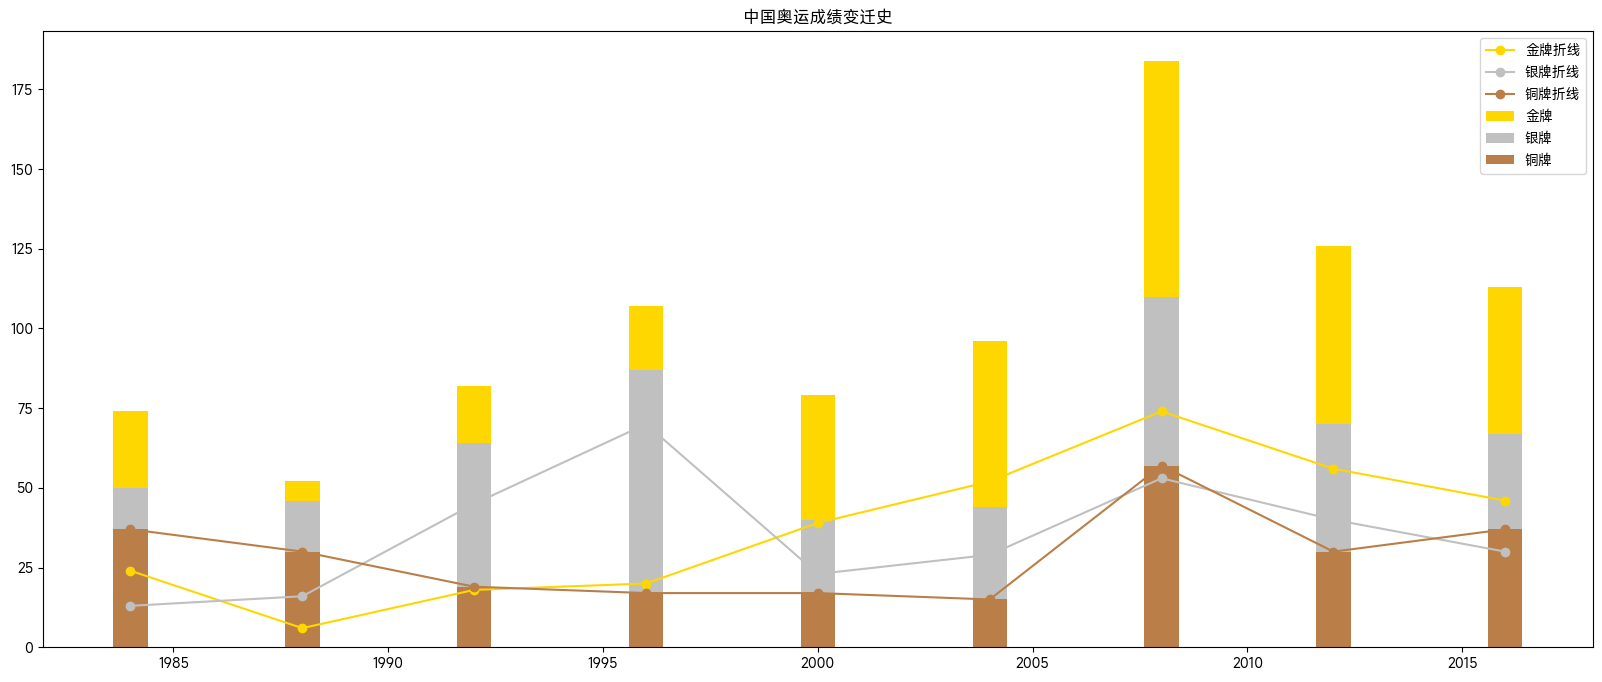

In [17]:
# 任务4.8
chinaData = data_merge[data_merge['region'] == 'China']
chinaMedal = chinaData.groupby(
    'Year')['Medal'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(20, 8))
plt.bar(chinaMedal.index, chinaMedal['Gold'], bottom=chinaMedal['Silver']+chinaMedal['Bronze'], color='gold', label='金牌')
plt.bar(chinaMedal.index, chinaMedal['Silver'],bottom=chinaMedal['Bronze'],color='silver', label='银牌')
plt.bar(chinaMedal.index, chinaMedal['Bronze'],color='#ba7e48', label='铜牌')
plt.plot(chinaMedal.index, chinaMedal['Gold'],marker='o', color='gold', label='金牌折线')
plt.plot(chinaMedal.index, chinaMedal['Silver'], marker='o', color='silver', label='银牌折线')
plt.plot(chinaMedal.index, chinaMedal['Bronze'],marker='o', color='#ba7e48', label='铜牌折线')
plt.title('中国奥运成绩变迁史')
plt.legend()
plt.show()


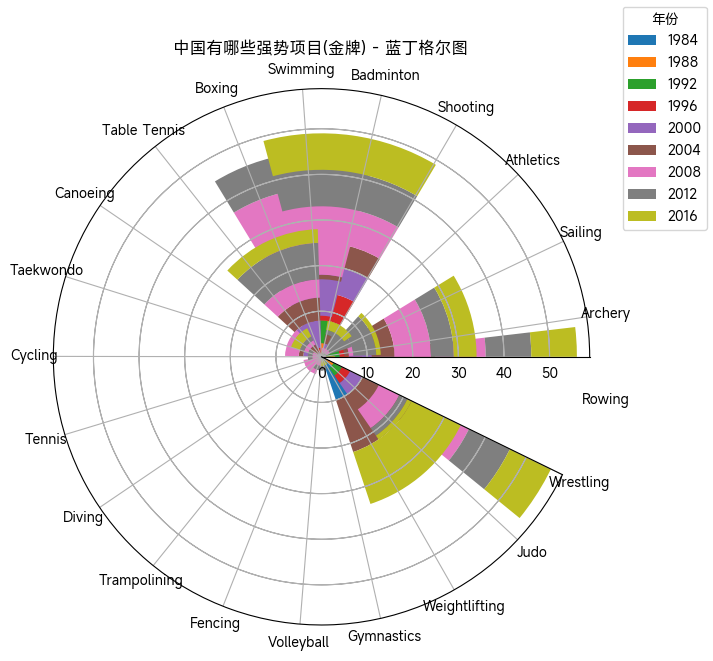

In [18]:
# 任务4.9 中国有哪些强势项目(金牌) - 蓝丁格尔图（3分）
chinaData = data_merge[(data_merge['region'] == 'China')
                       & (data_merge['Medal'] == 'Gold')]
chinaSport = chinaData.groupby(
    'Year')['Sport'].value_counts().unstack(fill_value=0).T
# 绘制极坐标堆叠柱形图
fig,ax=plt.subplots(subplot_kw=dict(polar=True),figsize=(8,7))
# 获取项目列表和年份列表
years = chinaSport.columns
sports = chinaSport.index
len(sports)
bottom = [0] * len(sports)
for i, year in enumerate(years):
    values = chinaSport[year]
    ax.bar(sports, values, bottom=bottom, label=year)
    bottom += values
ax.set_xticks(2 * 3.14 / len(sports) * (0.5 + 2 * np.arange(len(sports))))
ax.set_xticklabels(sports)
fig.legend(loc='upper right',title='年份')  # 图例（legend）显示的是年份
plt.title('中国有哪些强势项目(金牌) - 蓝丁格尔图')
plt.show()

### 模块C 机器学习

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
plt.rcParams['font.sans-serif'] = ['miSans']


In [20]:
# 任务1 数据获取
data = pd.read_csv('data/orange_juice.csv')
data.head(3)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.50,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.60,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.68,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1


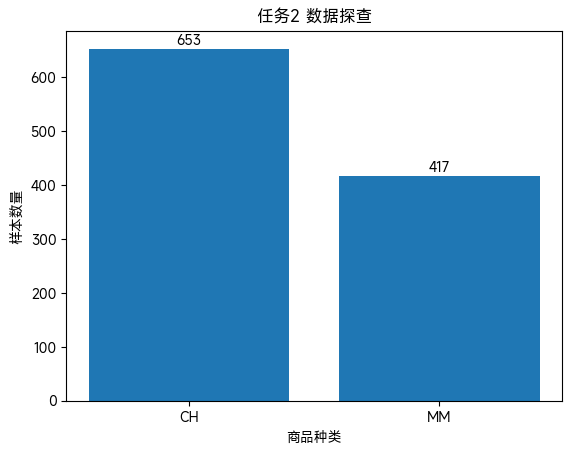

In [21]:
# 任务2 数据探查

countValue = data.value_counts(data['Purchase'], sort=True)
yData = countValue.to_list()
xData = ['CH', 'MM']
barData = plt.bar(xData, yData)
plt.bar_label(barData)
plt.title("任务2 数据探查")
plt.ylabel("样本数量")
plt.xlabel("商品种类")
plt.show()


In [22]:
# 任务3 数据预处理与特征工程
'''
# 哑变量编码 把属性值转为0,1编码
在哑变量编码中，我们将每个属性值转换为一个二进制变量，
通常表示为0或1。对于具有n个可能取值的属性，我们创建n个新的二进制变量，每个变量对应一个属性值。
如果样本的属性值是该变量所对应的值，则将该变量设置为1，否则设置为0。
这种编码方式可以有效地表示分类属性，并消除了属性值之间的序列关系。
同时，它可以避免在机器学习模型中引入任意的连续量级，从而更好地处理离散特征。
举个例子，假设有一个颜色属性，包含“红”、“绿”和“蓝”三个可能的取值。通过哑变量编码，我们可以将该属性扩展为三个新的二进制变量：“颜色_红”、“颜色_绿”和“颜色_蓝”。如果样本的颜色是“红”，那么“颜色_红”等于1，而“颜色_绿”和“颜色_蓝”都等于0。以此类推，根据实际情况设置对应的二进制编码。'''
data['Purchase'] = data['Purchase'].map({"CH": 0, "MM": 1})
data['Store7'] = data['Store7'].map({'Yes': 1, 'No': 0})
# 归一化处理
data['WeekofPurchase'] = StandardScaler().fit_transform(
    data['WeekofPurchase'].values.reshape(-1, 1))
data.drop('WeekofPurchase', axis=1, inplace=True)
data.head(3)


,Purchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,1,1.75,1.99,0.00,0.0,0,0,0.50,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,1,1.75,1.99,0.00,0.3,0,1,0.60,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,1,1.86,2.09,0.17,0.0,0,0,0.68,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1


In [23]:
# 任务4 模型训练
# 任务4.1 划分数据集
# 划分特征X与标签y
X = data.loc[:, data.columns != 'Purchase']
y = data['Purchase']
# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)
print("训练集样本数:", len(X_train))
print("测试集样本数:", len(X_test))
print("总样本数:", len(X_train)+len(X_test))


训练集样本数: 856
测试集样本数: 214
总样本数: 1070


In [24]:
# 任务4.2 选择模型,训练模型,寻找最佳模型参数
""" 
# 模型选择 逻辑回归
model = LogisticRegression()
# 定义超参数网格
paramGrid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 500]
}
# 网格搜索
grid_search = GridSearchCV(model, paramGrid, cv=5)
grid_search.fit(X_train, y_train)
print("最佳参数：", grid_search.best_params_)
print("最佳模型：", grid_search.best_estimator_)
print("最佳准确率：", grid_search.best_score_)  # 0.84
 """


# 随机森林
param_grid = {
    'n_estimators': [1, 50, 100, 150, 200],  # 决策树的数量
    'max_depth': [None, 1, 5, 10, 15, 50],  # 决策树的最大深度
    'min_samples_split': [2, 5, 10, 50],  # 分裂内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4, 50],  # 叶子节点所需的最小样本数
    "random_state": [23]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("最佳参数组合：", grid_search.best_params_)
print("最佳准确率：", grid_search.best_score_)  # 0.82

""" 
# 向量机
from sklearn.svm import SVC
param_grid_svm = {
    'C': [0.01,0.1, 1, 10,100,1000,10000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_classifier = SVC()
grid_search=GridSearchCV(svm_classifier,param_grid_svm,cv=5)
# 在数据上执行网格搜索，找到最佳的超参数组合
grid_search.fit(X_train, y_train)

# 输出最佳参数组合和对应的准确率
print("最佳参数组合：", grid_search.best_params_)
print("最佳准确率：", grid_search.best_score_) #0.83
 """

"""
from sklearn.ensemble import GradientBoostingClassifier
# 创建梯度提升分类器
gb_classifier = GradientBoostingClassifier()
# 定义梯度提升模型的超参数范围
param_grid = {
    'n_estimators': [50, 100, 150],  # 决策树的数量
    'learning_rate': [0.1, 0.05, 0.01],  # 学习率
    'max_depth': [3, 5, 7],  # 决策树的最大深度
}
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)

# 在数据上执行网格搜索，找到最佳的超参数组合
grid_search.fit(X_train, y_train)
# 输出最佳参数组合和对应的准确率
print("最佳参数组合：", grid_search.best_params_)
print("最佳准确率：", grid_search.best_score_)
"""


最佳参数组合： {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 100, 'random_state': 23}
最佳准确率： 0.830592955256358


'\nfrom sklearn.ensemble import GradientBoostingClassifier\n# 创建梯度提升分类器\ngb_classifier = GradientBoostingClassifier()\n# 定义梯度提升模型的超参数范围\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],  # 决策树的数量\n    \'learning_rate\': [0.1, 0.05, 0.01],  # 学习率\n    \'max_depth\': [3, 5, 7],  # 决策树的最大深度\n}\ngrid_search = GridSearchCV(gb_classifier, param_grid, cv=5)\n\n# 在数据上执行网格搜索，找到最佳的超参数组合\ngrid_search.fit(X_train, y_train)\n# 输出最佳参数组合和对应的准确率\nprint("最佳参数组合：", grid_search.best_params_)\nprint("最佳准确率：", grid_search.best_score_)\n'

准确率为: 0.8411214953271028
精度: 0.8356164383561644
召回率: 0.7349397590361446
f1分数: 0.7820512820512822


Text(0.5, 1.0, '模型预测')

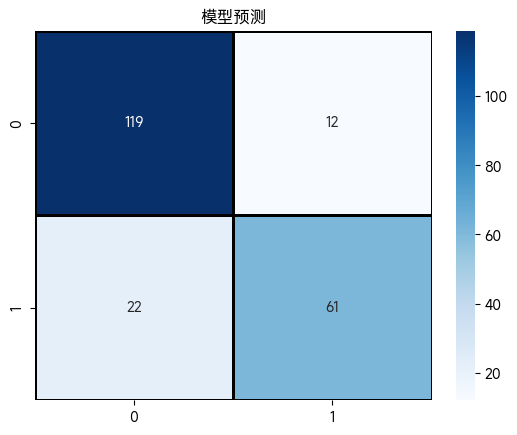

In [25]:
# 任务5 模型预测

# 加载最优模型
bestModel = grid_search.best_estimator_

# 模型预测
y_pred = bestModel.predict(X_test)
# # 查看混淆矩阵
matrix = confusion_matrix(y_test, y_pred)
print("准确率为:", accuracy_score(y_test, y_pred))
print("精度:", precision_score(y_test, y_pred))
print("召回率:", recall_score(y_test, y_pred))
print("f1分数:", f1_score(y_test, y_pred))
sns.heatmap(matrix, annot=True, cmap='Blues',
            fmt='d', linecolor='black', linewidths=1)
plt.title("模型预测")


In [26]:
# 任务6 结果保存
X_test['result'] = y_pred
X_test.to_csv('data/result2.csv')
